# <h1 style="text-align:center; color:blue;">Classification algorithms part 1</h1>

- Classification is a fundamental task in machine learning where the goal is to assign input data to one of several predefined categories or classes.
- It is widely used in applications such as spam detection, image recognition, medical diagnosis, and sentiment analysis.
- In classification problems, the output variable is categorical, meaning it represents discrete labels rather than continuous values.
- The performance of classification models is often evaluated using metrics such as accuracy, precision, recall, and the F1-score.


!["Classification"](https://lh5.googleusercontent.com/lBQZmzoJqePEXbESJWfnLBkD_dZSOkZBam_HYrpgYPVKx-pRJT_HH5PIIZiIJDSK3Vknnac1Z9rOKSvPjzeL9Ozq5ndqvAyEOkgyPNtVDBC2WBEZKgFbT58i-vjonfdoJP44CoG-GtzvLalgg3XKMEg)

### Common classification algorithms include:
- Logistic Regression
- Stochastic Gradient Descent Classifier (SGDClassifier)
- k-Nearest Neighbors (k-NN)
- Support Vector Machines (SVM)
- Decision Trees Classifiers
- Random Forests Classifiers
- Naive Bayes Classifiers
- AdaBoost Classifier
- Gradient Boosting Machines (e.g., XGBoost, LightGBM, CatBoost) Classifiers
- Neural Networks (including Deep Learning models)

**These algorithms can be used for binary, multiclass, and multilabel classification tasks.**


- In this section, we will generate a synthetic dataset suitable for a classification task.
- We will also apply some basic preprocessing steps to prepare the data for modeling.


In [42]:
import numpy as np
import numpy.typing as npt
import pandas as pd
from sklearn.datasets import make_classification

# 1. Generate synthetic classification data
X: npt.NDArray[np.float64]
y: npt.NDArray[np.int64]
X, y = make_classification(
    n_samples=1000,
    n_features=10,
    n_informative=6,
    n_redundant=2,
    n_classes=2,
    random_state=42
)

# Convert to DataFrame for easier manipulation
feature_names: list[str] = [f"feature_{i}" for i in range(X.shape[1])]
df: pd.DataFrame = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# 2. Introduce some NaN values randomly for demonstration
rng: np.random.Generator = np.random.default_rng(42)
nan_mask: npt.NDArray[np.bool_] = rng.choice([True, False], size=df[feature_names].shape, p=[0.05, 0.95])
df.loc[:, feature_names] = df[feature_names].mask(nan_mask)

df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-1.030931,1.391626,0.547274,0.928932,-1.738880,1.250002,1.332551,1.578256,2.124722,-0.318434,0
1,-2.766254,1.247870,-0.303691,1.083145,0.710836,1.968202,-1.794192,2.346422,1.700778,-0.001190,1
2,-0.558987,0.299849,1.527071,0.360442,-1.360209,1.100793,-0.755951,NaN,2.041105,-0.824404,0
3,-1.350289,-2.046078,-0.614264,0.126459,-0.783923,5.895026,-0.915477,-3.184768,-0.399260,-3.920960,0
4,-0.275754,-0.728495,0.027727,-0.660834,-1.928161,3.544945,1.446944,-1.111662,0.313766,-2.376528,0


In [43]:
# 3. Check for NaNs
print("Number of NaNs per feature:")
print(df[feature_names].isna().sum() / df.shape[0] * 100)

Number of NaNs per feature:
feature_0    6.0
feature_1    5.4
feature_2    5.1
feature_3    4.2
feature_4    5.7
feature_5    5.8
feature_6    4.1
feature_7    4.7
feature_8    4.8
feature_9    5.0
dtype: float64


**Note nan valus are not alot so we can remove it**

In [44]:
df.dropna(inplace=True)

In [45]:
# Check again
print("Number of NaNs per feature:")
print(df[feature_names].isna().sum() / df.shape[0] * 100)

Number of NaNs per feature:
feature_0    0.0
feature_1    0.0
feature_2    0.0
feature_3    0.0
feature_4    0.0
feature_5    0.0
feature_6    0.0
feature_7    0.0
feature_8    0.0
feature_9    0.0
dtype: float64


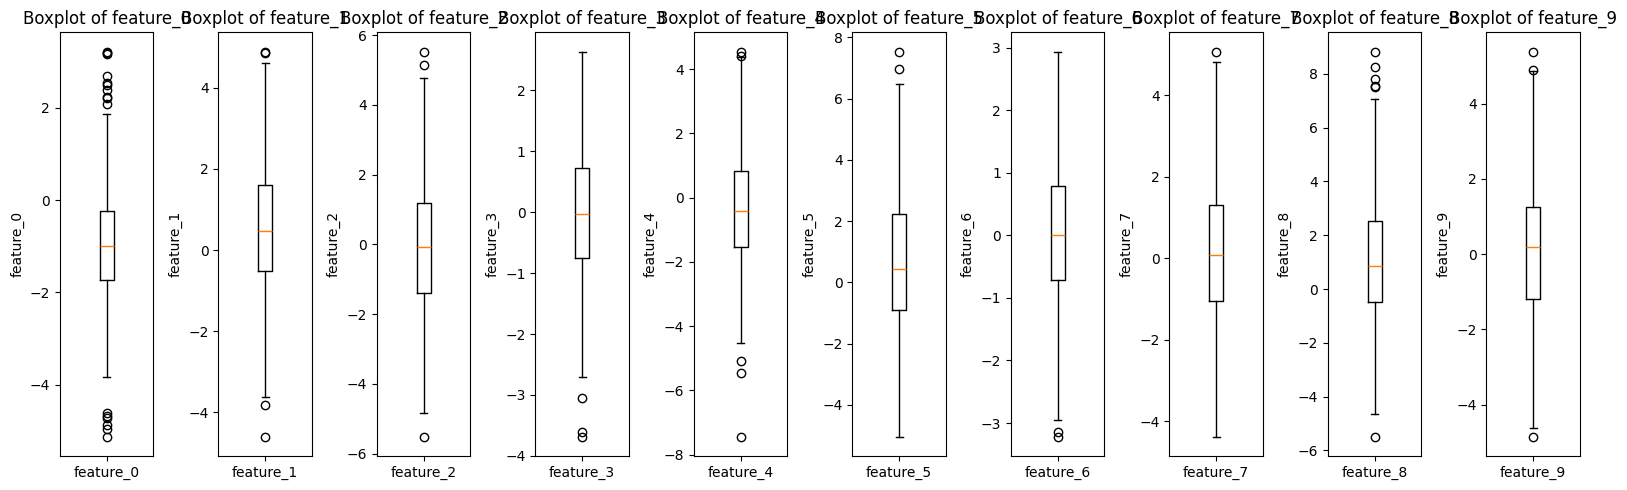

In [46]:
# 4.1 Outlier detection (using boxplot)

import matplotlib.pyplot as plt

features: list[str] = feature_names.copy()

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(16, 5))

for i, feature in enumerate(features):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xticks([1])
    axes[i].set_xticklabels([feature])
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


**All columns have outliers, we remove them as dealing with them is not in the course content**

In [47]:
# 4.2 Outlier removal (using IQR for numerical columns)
def remove_outliers_iqr(data: pd.DataFrame,
                        column: str) -> pd.DataFrame:
    Q1: float = data[column].quantile(0.25)
    Q3: float = data[column].quantile(0.75)
    IQR: float = Q3 - Q1
    not_outliers: pd.DataFrame = data[(data[column] > (Q1 - 1.5 * IQR)) & (data[column] < (Q3 + 1.5 * IQR))]
    return not_outliers


In [48]:
outliers_cols: list[str] = feature_names.copy()

for col in outliers_cols:
    df = remove_outliers_iqr(df, col)


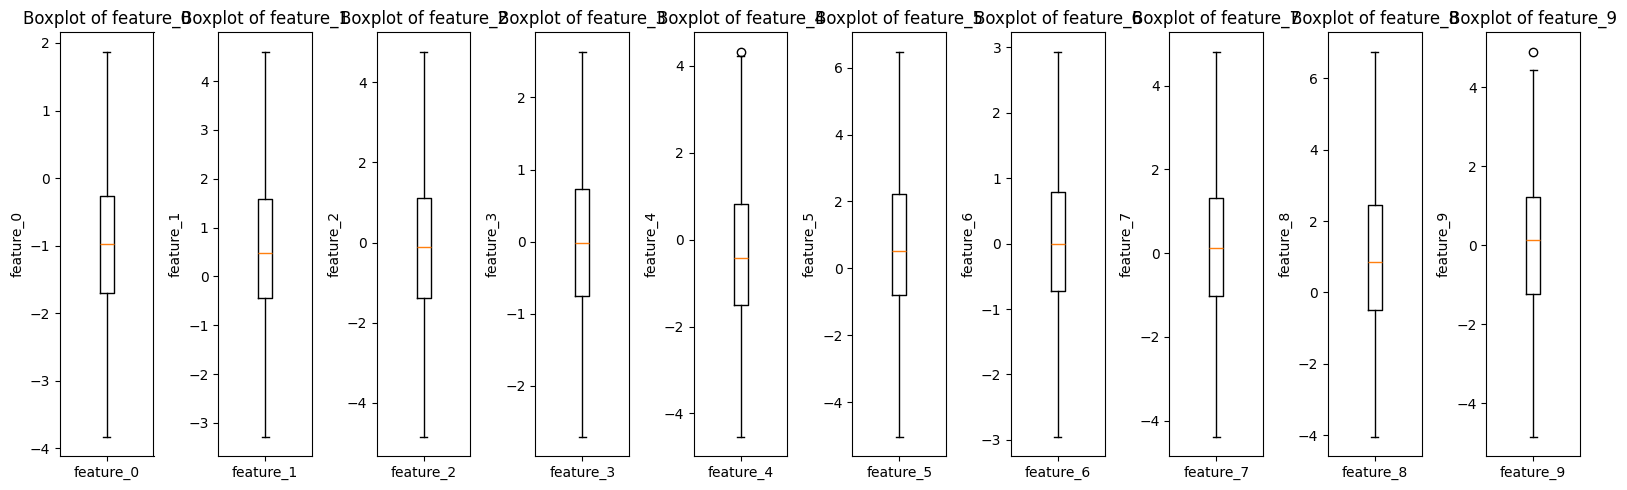

In [49]:
# Check

import matplotlib.pyplot as plt

features: list[str] = feature_names.copy()

# Create subplots
fig, axes = plt.subplots(1, len(features), figsize=(16, 5))

for i, feature in enumerate(features):
    axes[i].boxplot(df[feature])
    axes[i].set_title(f'Boxplot of {feature}')
    axes[i].set_xticks([1])
    axes[i].set_xticklabels([feature])
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()


**Note that these features are from different factor implementation**

In [50]:
# 5. Encoding and Scaling

# We will only use Scaling as sklearn created the target encoded internally

from sklearn.preprocessing import StandardScaler


# We already have the column names
numeric_cols: list[str] = feature_names.copy()

# Creating object
scaler: StandardScaler = StandardScaler()

# The template code for Scaling
for col in numeric_cols:
    df[[col]] = scaler.fit_transform(df[[col]])

df.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,-0.042451,0.583583,0.380326,0.912066,-0.827717,0.242161,1.244490,0.888740,0.529647,-0.173032,0
1,-1.666180,0.486832,-0.107735,1.063936,0.607658,0.570313,-1.732289,1.344909,0.326988,0.007596,1
3,-0.341271,-1.730075,-0.285861,0.121788,-0.268175,2.364513,-0.895719,-1.939745,-0.676894,-2.224197,0
4,0.664163,-0.843310,0.082346,-0.653541,-0.938624,1.290741,1.353396,-0.708647,-0.336046,-1.344846,0
7,0.564738,-0.281923,-0.743012,0.345645,-0.255306,-0.087309,-2.278079,1.318062,-0.492706,0.982123,1


In [34]:
# 6. Correlation matrix
corr_matrix = df.corr()
print("\nCorrelation matrix:")
corr_matrix


Correlation matrix:


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
feature_0,1.000000,-0.319970,0.222707,-0.075346,-0.113790,-0.208935,-0.002557,0.026162,-0.337328,-0.135017,-0.045475
feature_1,-0.319970,1.000000,-0.086783,0.004281,0.010228,-0.323565,-0.002139,0.140868,0.201513,0.169564,0.274828
feature_2,0.222707,-0.086783,1.000000,0.035600,-0.362258,-0.210583,0.053574,0.133378,0.660242,-0.259515,-0.052344
feature_3,-0.075346,0.004281,0.035600,1.000000,-0.077398,0.012256,-0.061927,-0.044773,0.106706,0.016075,0.030791
feature_4,-0.113790,0.010228,-0.362258,-0.077398,1.000000,-0.231556,-0.015813,0.111110,-0.599518,0.150161,0.243821
feature_5,-0.208935,-0.323565,-0.210583,0.012256,-0.231556,1.000000,-0.018938,0.060252,-0.263114,-0.733378,-0.624896
feature_6,-0.002557,-0.002139,0.053574,-0.061927,-0.015813,-0.018938,1.000000,-0.057683,0.046114,-0.019498,0.042021
feature_7,0.026162,0.140868,0.133378,-0.044773,0.111110,0.060252,-0.057683,1.000000,-0.068958,-0.001922,-0.015742
feature_8,-0.337328,0.201513,0.660242,0.106706,-0.599518,-0.263114,0.046114,-0.068958,1.000000,0.202898,0.122559
feature_9,-0.135017,0.169564,-0.259515,0.016075,0.150161,-0.733378,-0.019498,-0.001922,0.202898,1.000000,0.588081


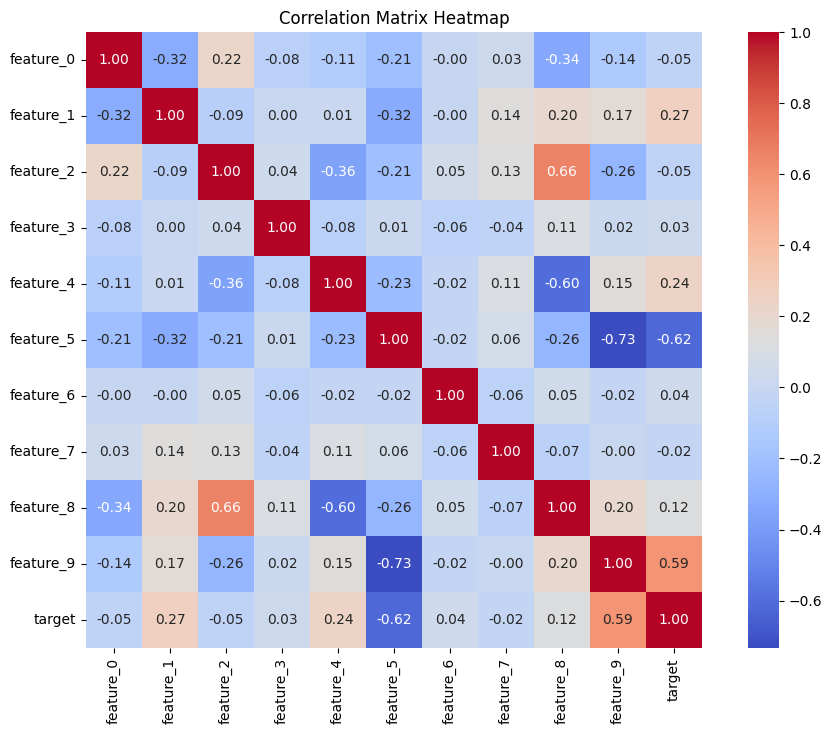

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [51]:
# Remove weak correlations

weak_corr_cols: list[str] = ['feature_0', 'feature_2', 'feature_3', 'feature_6', 'feature_7']

df.drop(weak_corr_cols, axis=1, inplace=True)

df.head()

,feature_1,feature_4,feature_5,feature_8,feature_9,target
0,0.583583,-0.827717,0.242161,0.529647,-0.173032,0
1,0.486832,0.607658,0.570313,0.326988,0.007596,1
3,-1.730075,-0.268175,2.364513,-0.676894,-2.224197,0
4,-0.843310,-0.938624,1.290741,-0.336046,-1.344846,0
7,-0.281923,-0.255306,-0.087309,-0.492706,0.982123,1


In [52]:
# 7. Splitting

from sklearn.model_selection import train_test_split

# Split the target and features

X: pd.DataFrame = df.drop('target', axis=1)
y: pd.Series = df['target']

X_train: pd.DataFrame
X_test: pd.DataFrame
y_train: pd.Series
y_test: pd.Series
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nTrain shape: {X_train.shape}, Test shape: {X_test.shape}")


Train shape: (447, 5), Test shape: (112, 5)


- In this section, we will focus on training and evaluating our classification model.
- We will implement a function that trains a given model and returns both the classification report and the confusion matrix for its predictions.


In [53]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.base import BaseEstimator
from typing import Tuple

def evaluate_model(model: BaseEstimator,
                   X_train: pd.DataFrame,
                   y_train: pd.Series,
                   X_test: pd.DataFrame,
                   y_test: pd.Series) -> Tuple[str, npt.NDArray[np.int64]]:
    """
    Trains the given model and returns the classification report and confusion matrix for test predictions.

    Parameters:
        model: The classification model to train.
        X_train: Training features.
        y_train: Training labels.
        X_test: Test features.
        y_test: Test labels.

    Returns:
        report: Classification report as a string.
        cm: Confusion matrix as a numpy array.
    """
    model.fit(X_train, y_train)
    y_pred: npt.NDArray[np.float64] = model.predict(X_test)
    report: str = classification_report(y_test, y_pred)
    cm: npt.NDArray[np.int64] = confusion_matrix(y_test, y_pred)
    return report, cm


### 1- Logistic Regression

In [54]:
from sklearn.linear_model import LogisticRegression

LR: BaseEstimator = LogisticRegression()

report, cm = evaluate_model(model=LR,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test
                            )

print("\nClassification report\n", report)
print("\nConfusion matrix\n")
cm


Classification report
               precision    recall  f1-score   support

           0       0.79      0.81      0.80        57
           1       0.80      0.78      0.79        55

    accuracy                           0.79       112
   macro avg       0.79      0.79      0.79       112
weighted avg       0.79      0.79      0.79       112


Confusion matrix



array([[46, 11],
       [12, 43]])

**Note that confusion matrix better to be printed as a heatmap for better look, but guess what! we don't care**

### 2- Stochastic Gradient Descent Classifier (SGDClassifier)

In [55]:
from sklearn.linear_model import SGDClassifier

SGD: BaseEstimator = SGDClassifier()

report, cm = evaluate_model(model=SGD,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test
                            )

print("\nClassification report\n", report)
print("\nConfusion matrix\n")
cm


Classification report
               precision    recall  f1-score   support

           0       0.81      0.75      0.78        57
           1       0.76      0.82      0.79        55

    accuracy                           0.79       112
   macro avg       0.79      0.79      0.79       112
weighted avg       0.79      0.79      0.79       112


Confusion matrix



array([[43, 14],
       [10, 45]])

### 3- K-Nearest Neighbors (KNN)

In [56]:
from sklearn.neighbors import KNeighborsClassifier

KNN: BaseEstimator = KNeighborsClassifier()

report, cm = evaluate_model(model=KNN,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test
                            )

print("\nClassification report\n", report)
print("\nConfusion matrix\n")
cm


Classification report
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        57
           1       0.90      0.78      0.83        55

    accuracy                           0.85       112
   macro avg       0.85      0.85      0.85       112
weighted avg       0.85      0.85      0.85       112


Confusion matrix



array([[52,  5],
       [12, 43]])